In [240]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [241]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=["date"], index_col="date")
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [243]:
# Clean data
df = df[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] <= df["value"].quantile(0.975))]
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


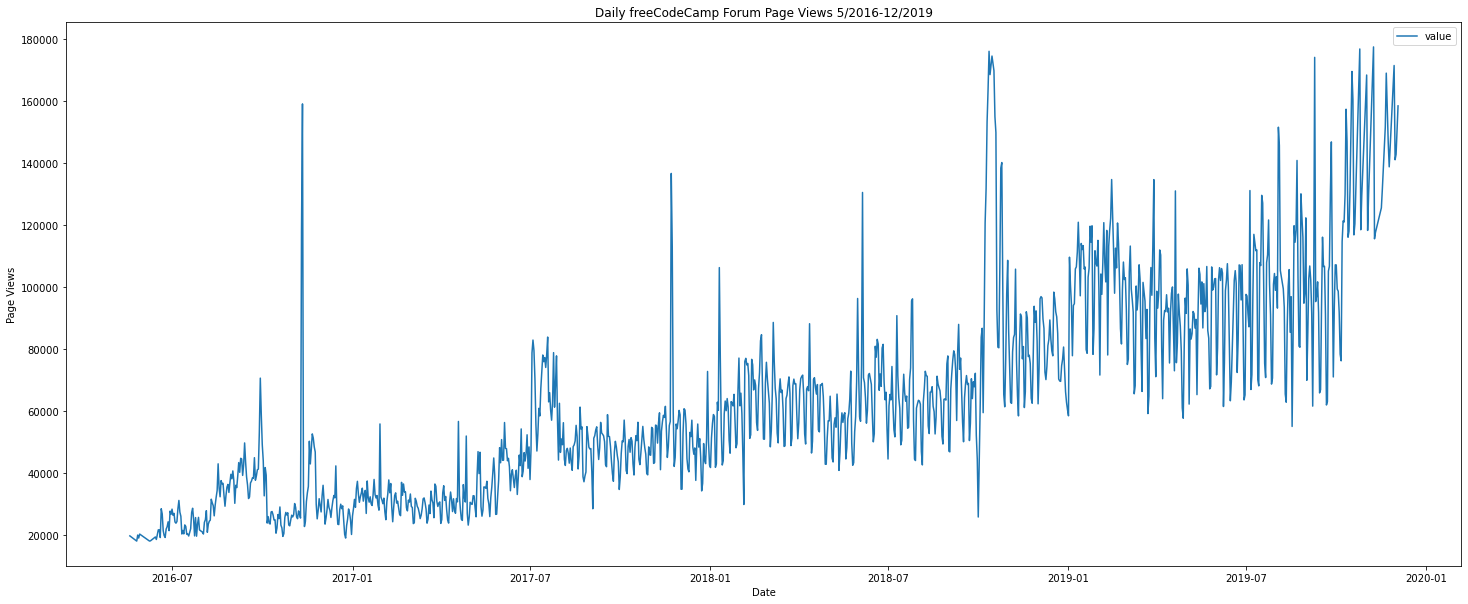

In [244]:
# Draw line plot
df_line = df.copy()
fig, axis = plt.subplots(figsize=(25, 10))
axis.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
axis.set_xlabel("Date")
axis.set_ylabel("Page Views")
axis = sns.lineplot(data=df)
fig.savefig('line_plot.png')

In [245]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df_bar["Years"] = df_bar.index.year
df_bar["Months"] = df_bar.index.month_name()
df_bar = pd.DataFrame(df_bar.groupby(["Years", "Months"], sort=False)["value"].mean().round().astype(int))
df_bar = df_bar.rename(columns={"value": "Average Page Views"})
df_bar = df_bar.reset_index()
missing_data = {
        "Years": [2016, 2016, 2016, 2016],
        "Months": ['January', 'February', 'March', 'April'],
        "Average Page Views": [0, 0, 0, 0]
    }
df_bar = pd.concat([pd.DataFrame(missing_data), df_bar])
df_bar


,Years,Months,Average Page Views
0,2016,January,0
1,2016,February,0
2,2016,March,0
3,2016,April,0
0,2016,May,19432
1,2016,June,21875
2,2016,July,24110
3,2016,August,31049
4,2016,September,41477
5,2016,October,27398


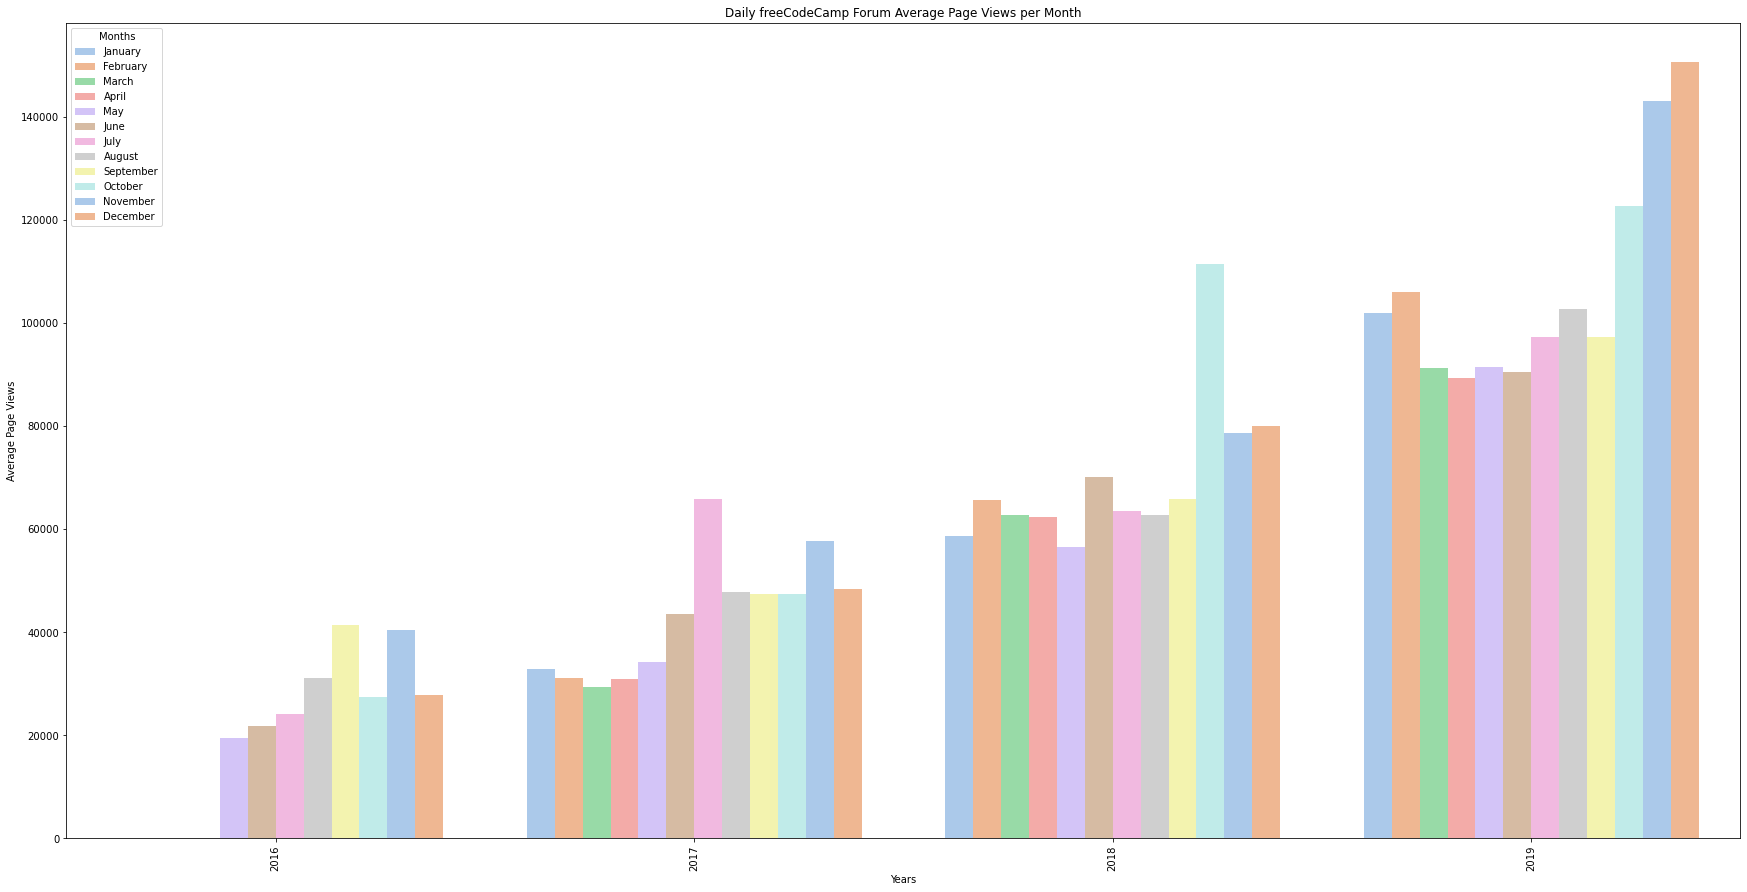

In [246]:
# Draw bar plot
fig, ax = plt.subplots(figsize=(30, 15))
ax.set_title("Daily freeCodeCamp Forum Average Page Views per Month")
chart = sns.barplot(data=df_bar, x="Years", y="Average Page Views", hue="Months", palette="pastel")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
#Save image and return fig (don't change this part)
fig.savefig('bar_plot.png')

In [247]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


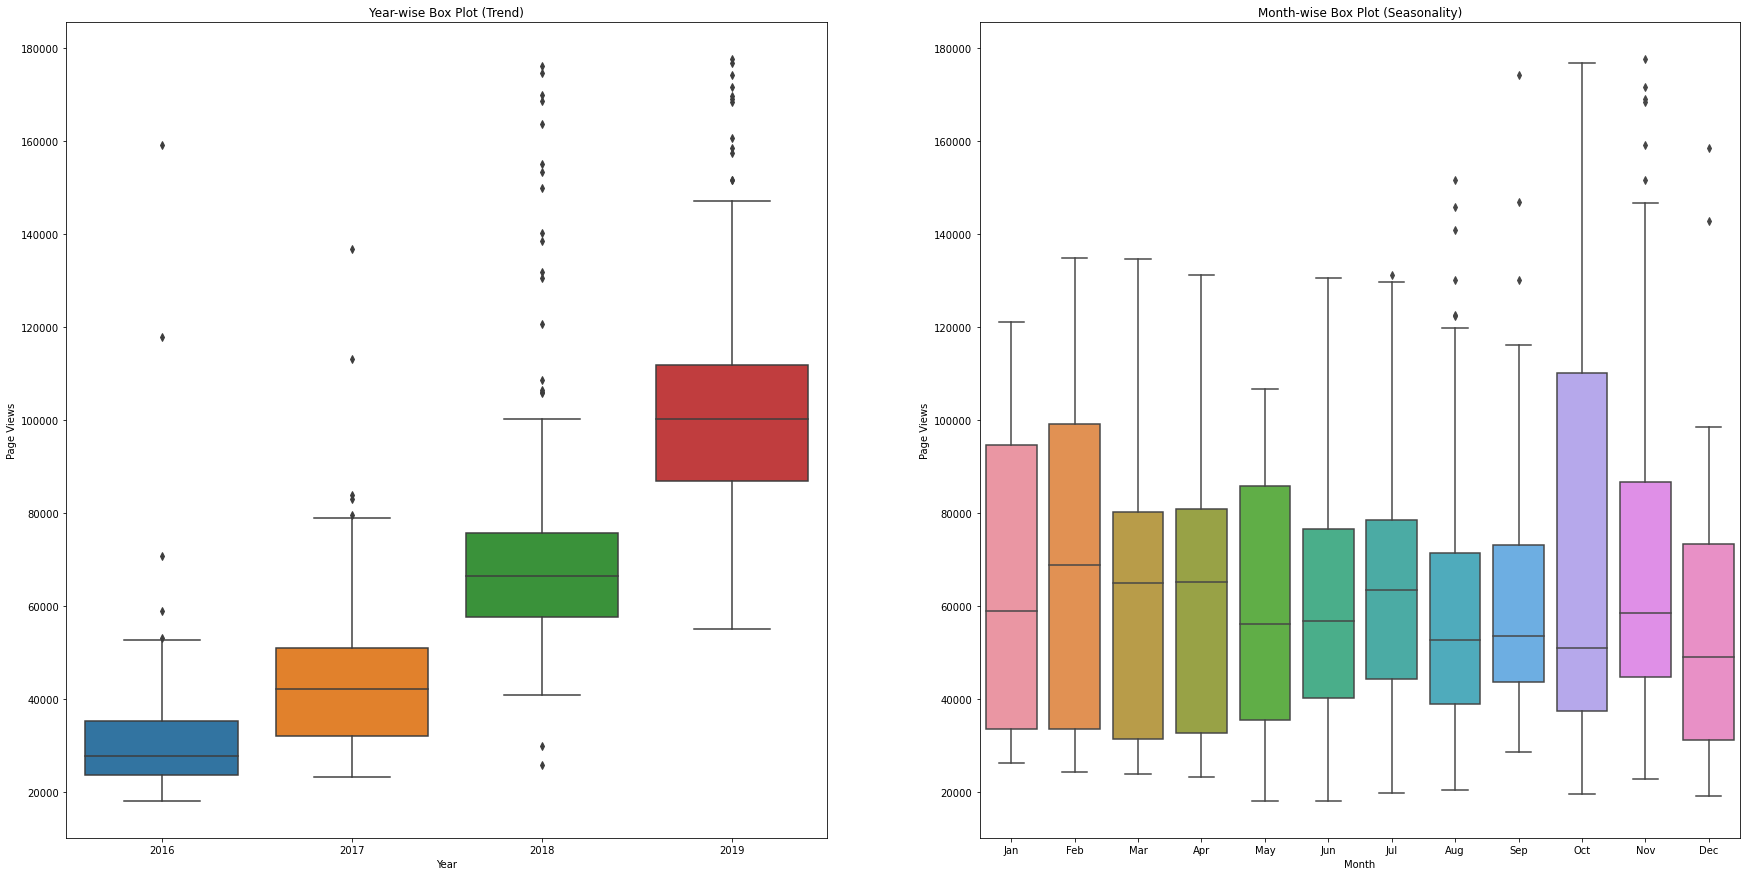

In [248]:
# Draw box plots (using Seaborn)
fig, axes = plt.subplots(1, 2, figsize=(30, 15))

# Year boxplot
sns.boxplot(data=df_box, x="year", y="value", ax=axes[0])
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")
    
# Month boxplot
monthly = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.boxplot(data=df_box, x="month", y="value", order=monthly, ax=axes[1])
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")
fig.savefig('box_plot.png')